# Einstein Rosen waves and the self similarity hypothesis in cylindrical symmetry by Harada Nakao and Nolan
##  Geoff Cope
##  Univeristy of Utah
##  December 24, 2021  Christmas Eve!

Einstein Tensor for Metric 2.2 needs to set equal to a yet to be defined stress energy tensor.  Here we concentrate on the metric given as equation 2.13 and find the vacuum field equations for this metric.

https://arxiv.org/abs/0812.3462

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [61]:
k,x,u,v,phi,z,du,dv,dphi,dz,dt,dx = symbols('k x u v phi z du dv dphi dz dt dx')

In [4]:
gamma, psi,r = symbols('gamma psi r')

In [5]:
gamma = Function('gamma')(t,x)
gamma

In [6]:
psi = Function('psi')(t,x)
psi

In [7]:
variables = Matrix( [t,x,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,dx,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dx ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = expand(exp(2*(gamma-psi))*( - dt**2 + dx**2 ) + exp(-2*psi)*x**2*dphi**2 + exp(2*psi)*dz**2) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(t, x)  -2⋅ψ(t, x)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, x)  -2⋅ψ(t, x)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(t, x)            ⎥
⎢           0                       0             x ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(t, x)⎥
⎣           0                       0                   0         ℯ         ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  2⋅γ(t, x)  -2⋅ψ(t, x)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, x)  -2⋅ψ(t, x)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(t, x)            ⎥
⎢           0                       0             x ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(t, x)⎥
⎣           0                       0                   0         ℯ         ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t x phi z")
t,x,phi,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, x)) - ──(ψ(t, x))  ──(γ(t, x)) - ──(ψ(t, x))               0                      
⎢⎢∂t            ∂t           ∂x            ∂x                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, x)) - ──(ψ(t, x))  ──(γ(t, x)) - ──(ψ(t, x))               0                      
⎢⎢∂x            ∂x           ∂t            ∂t                                               
⎢⎢                                                                                          
⎢⎢                                                        2  -2⋅γ(t, x) ∂                   
⎢⎢            0                          0              -x ⋅ℯ          ⋅──(ψ(t, x))         
⎢⎢                                                                    

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛    2              2                           2     2              2         ⎞         
⎢  ⎜   ∂              ∂               ⎛∂          ⎞     ∂              ∂          ⎟   ∂     
⎢x⋅⎜- ───(γ(t, x)) + ───(γ(t, x)) - 2⋅⎜──(ψ(t, x))⎟  + ───(ψ(t, x)) - ───(ψ(t, x))⎟ + ──(γ(t
⎢  ⎜    2              2              ⎝∂t         ⎠      2              2         ⎟   ∂x    
⎢  ⎝  ∂t             ∂x                                ∂t             ∂x          ⎠         
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                      x                                    
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                ∂    

In [18]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                        ∂                                               ∂  
⎢               2                2   1.0⋅──(γ(t, x))                                     ──(
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂x                    ∂           ∂             ∂t 
⎢- ⎜──(ψ(t, x))⎟  - ⎜──(ψ(t, x))⎟  + ───────────────       - 2⋅──(ψ(t, x))⋅──(ψ(t, x)) + ───
⎢  ⎝∂t         ⎠    ⎝∂x         ⎠           x                  ∂t          ∂x               
⎢                                                                                           
⎢                                   ∂                                                       
⎢                                   ──(γ(t, x))                      2                2   1.
⎢         ∂           ∂             ∂t                  ⎛∂          ⎞    ⎛∂          ⎞      
⎢     - 2⋅──(ψ(t, x))⋅──(ψ(t, x)) + ───────────       - ⎜──(ψ(t, x))⎟  - ⎜──(ψ(t, x))⎟  + ──
⎢         ∂t          ∂x                 x              ⎝∂t         ⎠ 

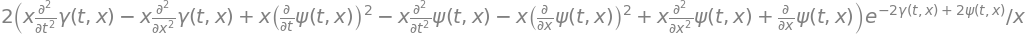

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

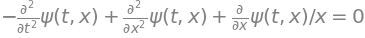

In [41]:
equation2pt14 = Eq(expand((1/x)*Ric.tensor()[2,2].args[1]),0)
equation2pt14

In [23]:
equation2pt15 = Eq(diff(gamma,x),solve( simplify(einst.tensor())[0,0] , diff(gamma,x))[0])
equation2pt15

In [24]:
equation2pt16 = Eq(diff(gamma,t),solve( Ric.tensor()[1,0] , diff(gamma,t) )[0] )
equation2pt16

In [42]:
vacuumFieldEquations = Matrix([equation2pt14,equation2pt15,equation2pt16])
vacuumFieldEquations

⎡                                 ∂               ⎤
⎢     2              2            ──(ψ(t, x))     ⎥
⎢    ∂              ∂             ∂x              ⎥
⎢ - ───(ψ(t, x)) + ───(ψ(t, x)) + ─────────── = 0 ⎥
⎢     2              2                 x          ⎥
⎢   ∂t             ∂x                             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(t, x)) = x⋅⎜⎜──(ψ(t, x))⎟  + ⎜──(ψ(t, x))⎟ ⎟⎥
⎢∂x              ⎝⎝∂t         ⎠    ⎝∂x         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(t, x)) = 2⋅x⋅──(ψ(t, x))⋅──(ψ(t, x))    ⎥
⎣    ∂t                ∂t          ∂x             ⎦

In [29]:
from sympy import Function, Eq, pde_separate_mul, Derivative as D

In [52]:
u, X, Y = map(Function, 'uXY')

In [53]:
psi

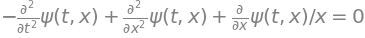

In [54]:
eq = vacuumFieldEquations[0]
eq

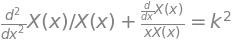

In [65]:
xODE = Eq(pde_separate( eq, psi, [X(x),Y(t)])[0] , k**2 ) 
xODE

In [67]:
from sympy import dsolve 

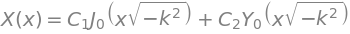

In [70]:
xSolution = dsolve( xODE , X(x))
xSolution 

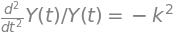

In [66]:
yODE = Eq( pde_separate( eq, psi, [X(x),Y(t)])[1] , - k**2 ) 
yODE

In [71]:
ySolution = dsolve( yODE , Y(t))
ySolution 

In [88]:
ySolution.args[1].args[0].args[0]

In [89]:
ySolution.args[1].args[0].args[0]